<a href="https://colab.research.google.com/github/Ekliipce/Machine-Learning-for-Biomedical/blob/main/molecules/Molecules_representations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install rdkit
!pip install rdkit-pypi

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit import DataStructs
from rdkit.ML.Descriptors import MoleculeDescriptors


from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


## Ex 1. Read molecules from SMILES

SMILES (Simplified Molecular-Input Line-Entry System) is a popular method for specifying molecules with text string. The RDkit library provides utilities to read molecules from SMILES.


Paracetamol (Acetaminophen) is a commonly used medicine that can help treat pain and reduce a high temperature. It's given by the chemical formula $ C_8H_9N O_2$ and its SMILES is "CC(=O)NC1=CC=C(O)C=C1".



1-2. Create the paracetamol molecule from its SMILES using the rdkit.Chem.MolFromSmiles class. Visualize its structure.

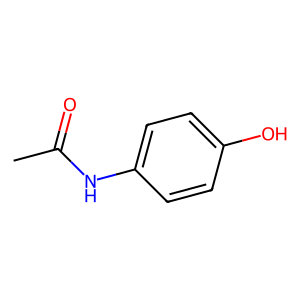

In [3]:
paracemetamol_smiles = "CC(=O)NC1=CC=C(O)C=C1"
paracetamol = Chem.MolFromSmiles(paracemetamol_smiles)
Chem.Draw.MolToImage(paracetamol)

3. Print out the number of atoms.

In [4]:
paracetamol.GetNumAtoms()

11

We get 11 atoms instead of 20. It is beacause SMILES représentation of hydrogens is implicit.<br> We can add the hydrogens like that :

In [5]:
paracetamol_hs = Chem.AddHs(paracetamol)
paracetamol_hs.GetNumAtoms()

20

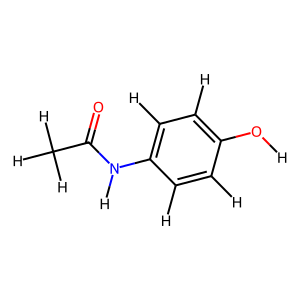

In [6]:
Chem.Draw.MolToImage(paracetamol_hs)

4. Print out the list of atoms.

In [7]:
list_atoms = paracetamol.GetAtoms()
list_symbols = [mol.GetSymbol() for mol in list_atoms]
list_symbols

['C', 'C', 'O', 'N', 'C', 'C', 'C', 'C', 'O', 'C', 'C']

 5. Find the number of bonds.



In [8]:
nbr_bounds = paracetamol.GetNumBonds()
nbr_bounds

11

## Ex 2 Read data from chemical file format

Apart SMILES, .SDF/ .Mol are also the common formats to save molecules. RDKit provides also functionalities to read these files.


Morphine is an opioid agonist used for the relief of moderate to severe acute and chronic pain. The chemical information of this drug can be found at
"https://go.drugbank.com/structures/small_molecule_drugs/DB00295.sdf".



1. Download this file and save it in a folder.

In [9]:
!wget https://go.drugbank.com/structures/small_molecule_drugs/DB00295.sdf

--2023-09-23 09:50:48--  https://go.drugbank.com/structures/small_molecule_drugs/DB00295.sdf
Resolving go.drugbank.com (go.drugbank.com)... 172.66.41.6, 172.66.42.250, 2606:4700:3108::ac42:2906, ...
Connecting to go.drugbank.com (go.drugbank.com)|172.66.41.6|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: ‘DB00295.sdf.4’

DB00295.sdf.4           [ <=>                ]   7.38K  --.-KB/s    in 0s      

2023-09-23 09:50:49 (68.6 MB/s) - ‘DB00295.sdf.4’ saved [7559]



2. Read the morphine molecule from the file that you've downloaded using "rdkit.Chem.SDMolSupplier"

In [10]:
name_morphine = 'DB00295.sdf'
morphine_suppl = Chem.SDMolSupplier(name_morphine)
len(morphine_suppl)

1

In [11]:
morphine = morphine_suppl[0]
morphine.GetProp("GENERIC_NAME")

'Morphine'

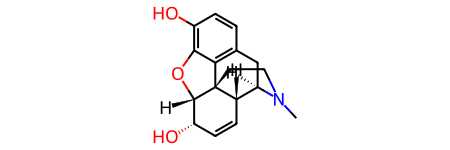

In [12]:
morphine

3. With the help of rdkit.Chem.AllChem.GetMorganFingerprintAsBitVect,<br> compute its fingerprint as a bit vector.

In [13]:
morphine_fp = AllChem.GetMorganFingerprintAsBitVect(morphine, 2, nBits=1024)
np.array(morphine_fp).shape

(1024,)

## EX3. Fingerprints


A chemical structure can be characterized by a set of numerical values known as molecular fingerprints. They may be 2D Fragment-based fingerprints presented by bit arrays of 0s and 1s wherein each bit position indicates the presence or absence of structural fragments.


The RDKit has a variety of built-in functionality for generating molecular fingerprints and then using them to calculate molecular similarity. In this exercise, we will generate the fingerprints for parcetamol and aspirin that are two popular drugs used for pains.

1. Fingerprint of the paracetamol as bit vector <br>
By using the rdkit.AllChem.GetMorganFingerprintAsBitVectCompute Class. <br> Convert it to a numpy vector. Known that Paracetamol's SMILES is ""CC(=O)OC1=CC=CC=C1C(O)=O". Choose the number of bits nBits= 1024.<br> Find the elements that are nonzero of the vector.

In [14]:
paracetamol_fp = AllChem.GetMorganFingerprintAsBitVect(paracetamol, 2, nBits=1024)
paracetamol_fp_np = np.array(paracetamol_fp).reshape(-1)
paracetamol_fp_np

array([0, 0, 0, ..., 0, 0, 0])

In [15]:
paracetamol_nonzero_elm = np.where(paracetamol_fp_np == 1)[0]
paracetamol_nonzero_elm

array([  33,   53,  128,  191,  245,  289,  356,  530,  578,  650,  726,
        745,  754,  792,  807,  843,  849,  893, 1017])

2. Aspirin.<br>

In [16]:
aspirin_smiles = "CC(=O)OC1=CC=CC=C1C(O)=O"
aspirin = Chem.MolFromSmiles(aspirin_smiles)
aspirin_fp = AllChem.GetMorganFingerprintAsBitVect(aspirin, 2, nBits=1024)
aspirin_fp_np = np.array(aspirin_fp).reshape(-1)
aspirin_fp_np

array([0, 0, 0, ..., 0, 0, 0])

In [17]:
aspirin_nonzero_elm = np.where(aspirin_fp_np == 1)[0]
aspirin_nonzero_elm

array([  11,   23,   33,   64,  175,  356,  386,  389,  423,  444,  456,
        592,  650,  695,  705,  726,  751,  807,  849,  893,  909,  946,
        967, 1017])


DiceSimilarity between the fingerprints of the paracetamol and the aspirin.

In [18]:
DataStructs.DiceSimilarity(aspirin_fp, paracetamol_fp)

0.37209302325581395

## EX 4: Descriptors

Molecules are also described by a set of physiochemical descriptors. They should be the log partition coefficient, the polar surface area ... that describe the molecule's structure.


RDKit provides utilities that allow us to compute descriptor of molecules.
Using the rdkit.ML.Descriptors.MoleculeDescriptors.MolecularDescriptorCalculator class, compute the descriptor for paracetamol molecule from SMILES string. Note that SMILES string for paracetamol is "CC(=O)NC1=CC=C(O)C=C1"



In [19]:
descriptors = ['MolLogP', 'TPSA', 'MolWt', 'NumValenceElectrons', 'NumAromaticRings']

calculator = MoleculeDescriptors.MolecularDescriptorCalculator(descriptors)
paracetamol_descr = calculator.CalcDescriptors(paracetamol)
paracetamol_descr

(1.3505999999999998, 49.33, 151.165, 58, 1)

## Ex5: SMART

In many commonly used applications, we need to determine whether atoms in a molecule match a particular pattern. It can be used for filtering structures or identifying substructures that are associated with toxicological problem.

SMART us an extension of the SMILES language that can be used to create queries.


1. Molecules that contain the "CCC" pattern

In [20]:
smiles_list = ["CCCCC","CCOCC","CCNCC","CC(=O)NC1=CC=C(O)C=C1", "CC(=O)NC1=CC=C(O[13CH3])C=C1", "CN(C(=O)C(Cl)Cl)C1=CC=C(O)C=C1"]

In [21]:
pattern = Chem.MolFromSmiles("CCC")

mols_list = [Chem.MolFromSmiles(smile) for smile in smiles_list]
mols_list_match = [mol for mol in mols_list if mol.GetSubstructMatch(pattern)]
len(mols_list_match)

1

2. Highlighting the pattern "CCC"

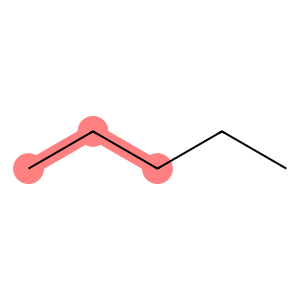

In [22]:
img = Chem.Draw.MolsToGridImage(mols_list_match,
                           molsPerRow=len(mols_list_match),
                           subImgSize=(300, 300),
                           highlightAtomLists=[mol.GetSubstructMatch(pattern) for mol in mols_list_match])

img

3. For the pattern "C(=O)N".

In [23]:
pattern2 = Chem.MolFromSmiles("C(=O)N")

mols_list_match2 = [mol for mol in mols_list if mol.GetSubstructMatch(pattern2)]
len(mols_list_match2)

3

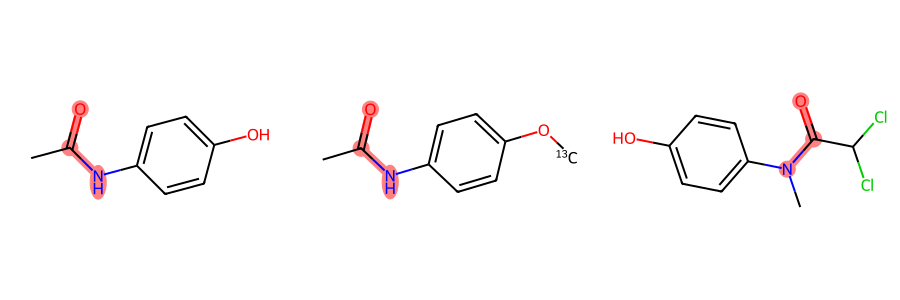

In [24]:
img = Chem.Draw.MolsToGridImage(mols_list_match2,
                           molsPerRow=len(mols_list_match2),
                           subImgSize=(300, 300),
                           highlightAtomLists=[mol.GetSubstructMatch(pattern2) for mol in mols_list_match2])

img

## Ex6: Machine learning with RDkit - Predict solubility

In this exercise, we will use machine learning to predict solubility of molecules. For this purpose, we will borrow a dataset from rdkit that is originated from the Huuskonen dataset. We will try to predict Aqueous Solubility for molecules that is known as "logS".


This exercise is divided into 3 parts: Preparing a dataset, training a model and preparing dataset for prediction and applying a predictive model.



## EX6.I Preparing dataset

Preparing dataset requires a few steps:




















1. Download file from "https://raw.githubusercontent.com/rdkit/rdkit/master/Docs/Book/data/solubility.train.sdf".

In [25]:
!wget https://raw.githubusercontent.com/rdkit/rdkit/master/Docs/Book/data/solubility.train.sdf

--2023-09-23 09:50:49--  https://raw.githubusercontent.com/rdkit/rdkit/master/Docs/Book/data/solubility.train.sdf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1376487 (1.3M) [text/plain]
Saving to: ‘solubility.train.sdf.4’

solubility.train.sd 100%[===================>]   1.31M  --.-KB/s    in 0.09s   

2023-09-23 09:50:49 (15.3 MB/s) - ‘solubility.train.sdf.4’ saved [1376487/1376487]



2. With the help of rdkit.Chem.SDMolSupplier, get list of molecules contained in this file. You should call this list as **molecule_list**. The option **removeHs=False** should be chosen.

In [26]:
sdf_path = 'solubility.train.sdf'
molecule_list = Chem.SDMolSupplier(sdf_path, removeHs=False)

In [27]:
len(molecule_list)

1025

3. Write a function named **calculate_descriptors(mol)** that allows us to calculate descriptors of a molecule. This function takes a Rdkit molecule as input and returns an array vector of descriptors.

In [28]:
descriptors = [desc_name for desc_name, _ in Chem.Descriptors.descList]

def calculate_descriptors(mol, descriptors=descriptors):
  calculator = MoleculeDescriptors.MolecularDescriptorCalculator(descriptors)
  return calculator.CalcDescriptors(mol)

In [29]:
compute_descr = list(map(calculate_descriptors, molecule_list))
df = pd.DataFrame(compute_descr, columns=descriptors)
print(df.shape)
df.head()

(1025, 208)


,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,2.211806,1.343750,2.211806,1.343750,0.468786,72.151,60.055,72.09390,32,0,...,0,0,0,0,0,0,0,0,0,0
1,1.500000,1.500000,1.500000,1.500000,0.408362,70.135,60.055,70.07825,30,0,...,0,0,0,0,0,0,0,0,0,0
2,2.231806,1.355000,2.231806,1.355000,0.462954,86.178,72.066,86.10955,38,0,...,0,0,0,0,0,0,0,0,1,0
3,2.253472,0.898148,2.253472,0.898148,0.483890,86.178,72.066,86.10955,38,0,...,0,0,0,0,0,0,0,0,0,0
4,2.243056,0.541667,2.243056,0.541667,0.424482,86.178,72.066,86.10955,38,0,...,0,0,0,0,0,0,0,0,0,0


4-5. Apply the function **caluclate_descriptors** to the list of molecules **molecule_list** and store the result in a dataframe named **df**. Look at few rows of **df** to see whether the descriptors are calculated. <br>
For each molecule from this dataset, we can get the aqueous solubility (logS) via attribute **getProp('SOL')**. Create a list that contains the aqueous solubility of all molecules from the **molecule_list** list. You should call this list by **labels**. Remember to convert these values to float format.

In [30]:
solubitlities = [mol.GetProp('SOL') for mol in molecule_list]
df['labels'] = solubitlities
df['labels'] = df['labels'].astype(float)
df.iloc[:5, -5:]

,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,labels
0,0,0,0,0,-3.18
1,0,0,0,0,-2.64
2,0,0,1,0,-3.84
3,0,0,0,0,-3.74
4,0,0,0,0,-3.55


In [31]:
df['labels'].dtypes

dtype('float64')

6. Plot the histogram of the "labels" list to see the distribution of the solubility of molecules. Do you have some comments about the aqueous solubility of molecules ?

(array([  2.,   3.,  20.,  32.,  62., 166., 236., 289., 159.,  56.]),
 array([-11.62, -10.3 ,  -8.98,  -7.66,  -6.34,  -5.02,  -3.7 ,  -2.38,
         -1.06,   0.26,   1.58]),
 <BarContainer object of 10 artists>)

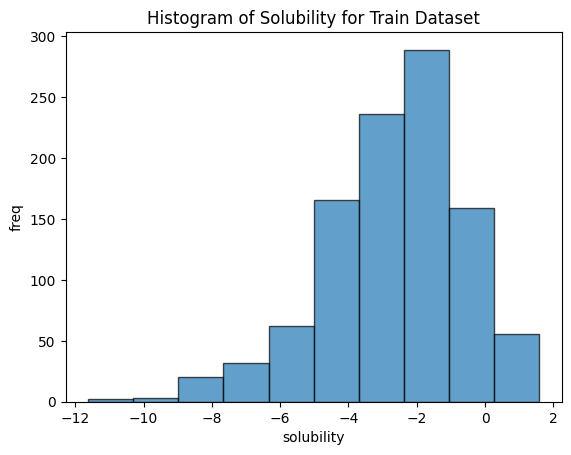

In [32]:
plt.title("Histogram of Solubility for Train Dataset")
plt.xlabel("solubility")
plt.ylabel("freq")
plt.hist(df['labels'], bins=10, edgecolor='k', alpha=0.7)

Molecule solubilty follows a gaussian distribution

## Ex6.II Feature Engineering and Training a model of regression.

Now, we have the **df** dataframe that contains the descriptors for molecules and the **labels** list that contains the solvant property of molecules.











1. Check the dataframe **df** to see whether it contains NaN values. How many row contained NaN values are there in the dataframe **df** ? Remove these rows from  **df** and **labels**.

In [33]:
df[df.isna().any(axis=1)]

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,labels
985,12.095556,-2.946217,12.095556,0.837269,0.597671,385.18,350.908,386.16316,116,0,...,0,0,0,0,0,0,0,0,0,-5.59


In [34]:
df = df.dropna()
df.shape

(1024, 209)

2. Apply the MinMaxScaler to the dataframe **df** to normalize the data.

In [35]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=np.concatenate((descriptors, ['labels'])))
df_scaled.head()

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,labels
0,0.045160,0.913346,0.045160,0.354103,0.401233,0.042084,0.033447,0.042052,0.072581,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.639394
1,0.000000,0.933978,0.000000,0.395291,0.323502,0.038831,0.033447,0.038797,0.064516,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.680303
2,0.046428,0.914831,0.046428,0.357068,0.393731,0.064721,0.053504,0.064685,0.096774,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.076923,0.0,0.589394
3,0.047803,0.854507,0.047803,0.236639,0.420664,0.064721,0.053504,0.064685,0.096774,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.596970
4,0.047142,0.807435,0.047142,0.142668,0.344239,0.064721,0.053504,0.064685,0.096774,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.611364


3. Construct and train a regression model.

### Linear Regression

In [36]:
X = df_scaled.iloc[:, :-1]
Y = df_scaled['labels']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [37]:
x_train.shape

(768, 208)

In [38]:
from sklearn.linear_model import LinearRegression

clf = LinearRegression().fit(x_train, y_train)


In [39]:
#R2 score
clf.score(x_test, y_test)

0.8927939057264365

In [40]:
def rmse(x, y):
  mse = mean_squared_error(x, y)
  return np.sqrt(mse)

x_predicted = clf.predict(x_test)
rmse(x_predicted, y_test)

0.05123719146154711

### XGBoost


In [41]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [42]:
xgb = xgb.XGBRegressor()
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
}
grid_search = GridSearchCV(xgb, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error')

In [43]:
print("Meilleurs paramètres trouvés: ", grid_search.best_params_)

Meilleurs paramètres trouvés:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150}


In [44]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

def compute_metrics(y_test, y_pred):
  mse = mean_squared_error(y_test, y_pred)
  rmse_ = rmse(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  print("MSE: ", mse)
  print("RMSE: ", rmse_)
  print("R2: ", r2)
  return mse, rmse_, r2

compute_metrics(y_test, y_pred)

MSE:  0.0021133252774719388
RMSE:  0.0459709177358027
R2:  0.9136991268838003


(0.0021133252774719388, 0.0459709177358027, 0.9136991268838003)

## Ex6.III Prepare data for test  and test model
















Note: If there exists problem of reading the file solubility.test.sdf as
"RDKit ERROR: [09:28:36] ERROR: moving to the beginning of the next molecule
RDKit ERROR: [09:32:48] ERROR: Counts line too short: '' on line4"
so, go to the url, click "raw" and save this file by hand. The error will be gone away


1. Download file from "https://github.com/rdkit/rdkit/blob/master/Docs/Book/data/solubility.test.sdf".

In [45]:
# 1. Download the file
!wget https://github.com/rdkit/rdkit/blob/master/Docs/Book/data/solubility.test.sdf

--2023-09-23 09:52:03--  https://github.com/rdkit/rdkit/blob/master/Docs/Book/data/solubility.test.sdf
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 327929 (320K) [text/plain]
Saving to: ‘solubility.test.sdf.2’

solubility.test.sdf 100%[===================>] 320.24K  --.-KB/s    in 0.1s    

2023-09-23 09:52:04 (2.49 MB/s) - ‘solubility.test.sdf.2’ saved [327929/327929]



2. Read molecules from this file and store them in a list named **list_molecule_test**.

In [46]:
sdf_test_path = 'solubility.test.sdf'
list_molecule_test = Chem.SDMolSupplier(sdf_test_path, removeHs=False)


3. Take a molecule from the **list_molecule_test** and then calculate its descriptions thank to the **calculate_descriptors(mol)** function that you've coded above.

In [47]:
descriptors = [desc_name for desc_name, _ in Chem.Descriptors.descList]
compute_descr_test = list(map(calculate_descriptors, list_molecule_test))

In [48]:
df_test = pd.DataFrame(compute_descr_test, columns=descriptors)
df_test = df_test.dropna()

solubitlities_test = [mol.GetProp('SOL') for mol in list_molecule_test]
df_test['labels'] = solubitlities_test
df_test['labels'] = df_test['labels'].astype(float)


(array([ 2., 10.,  9., 15., 30., 36., 69., 48., 24., 14.]),
 array([-9.15 , -8.122, -7.094, -6.066, -5.038, -4.01 , -2.982, -1.954,
        -0.926,  0.102,  1.13 ]),
 <BarContainer object of 10 artists>)

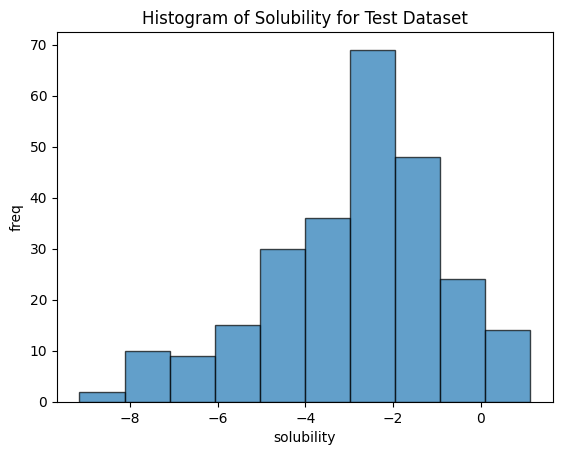

In [49]:
plt.title("Histogram of Solubility for Test Dataset")
plt.xlabel("solubility")
plt.ylabel("freq")
plt.hist(df_test['labels'], bins=10, edgecolor='k', alpha=0.7)


4. Apply **minmaxscaler** to these descriptors. Note that **minmaxscaler**  is one that you've created at Ex6.II.

In [50]:
test_scaled = scaler.transform(df_test)
test_scaled.shape

(257, 209)

In [51]:
test_scaled_x = test_scaled[:, :-1]
test_scaled_y = test_scaled[:, -1]
test_scaled_x.shape, test_scaled_y.shape

((257, 208), (257,))

5. Use the model that you've trained to predict the aqueous solubility (logS) of the molecule. Compare to the real logS value of the molecule.

##### Linear Regression

In [52]:
y_predicted = clf.predict(test_scaled_x)
real_y = test_scaled_y
compute_metrics(real_y, y_predicted)

MSE:  478949450282892.9
RMSE:  21884913.76000584
R2:  -2.053926820535729e+16


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


(478949450282892.9, 21884913.76000584, -2.053926820535729e+16)

It not generalize well

##### XGBoost

In [53]:
y_pred = best_model.predict(test_scaled_x)
compute_metrics(real_y, y_pred)

MSE:  0.0021705559023626774
RMSE:  0.04658922517452589
R2:  0.9069178807763197


(0.0021705559023626774, 0.04658922517452589, 0.9069178807763197)

Text(0, 0.5, 'Freq')

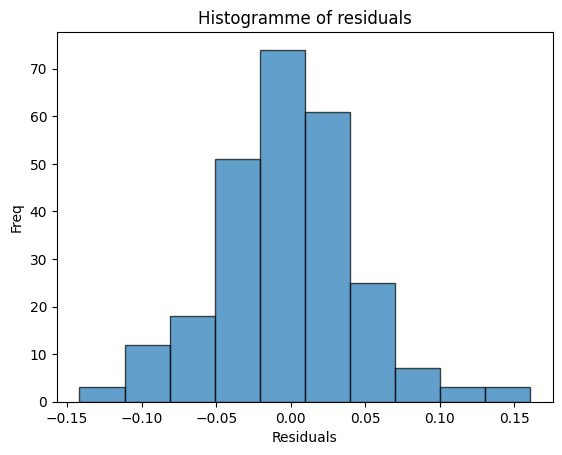

In [54]:
residuals = np.array(real_y - y_pred, dtype="float")

plt.hist(residuals, bins=10, edgecolor='k', alpha=0.7)
plt.title('Histogramme of residuals')
plt.xlabel('Residuals')
plt.ylabel('Freq')

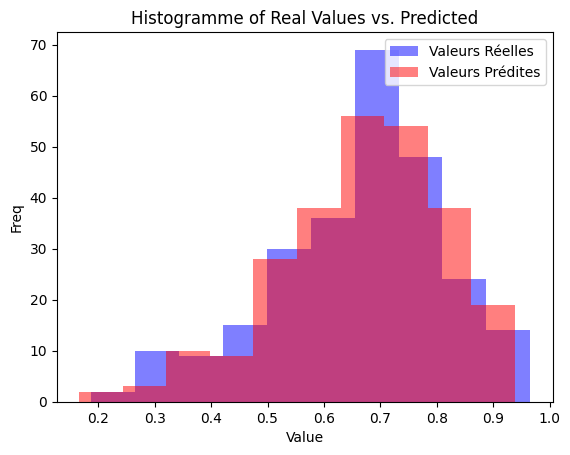

In [55]:
plt.hist(real_y, bins=10, alpha=0.5, label='Valeurs Réelles', color='blue')
plt.hist(y_pred, bins=10, alpha=0.5, label='Valeurs Prédites', color='red')

plt.title('Histogramme of Real Values vs. Predicted')
plt.xlabel('Value')
plt.ylabel('Freq')
plt.legend(loc='upper right')